## Machine Learning 실습

### 타이타닉 탑승객 생존 예측 Classification with Python

In [1]:
!pip install xgboost

In [2]:
# 1. 데이터 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#classification(분류)
from sklearn.tree import DecisionTreeClassifier      #의사결정트리
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier   #KNN(K_Nearst_Neighbor)K-최근접이웃
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.svm import SVC


from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score


In [3]:
# 2. 데이터 확인하기
df = pd.read_csv('../202106_MachineLearningClass/03Titanic_dataset.csv')
df

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df.describe(include = 'all')

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [5]:
# 3. 빠진 값 확인
df.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
# 4. 사용하지 않을 feature 제거
# 종속 변수를 뺀 나머지를 데이터 셋으로 만듬(비교하기 위해)
feature = df.drop(['survived','name', 'ticket','boat','body','home.dest','cabin'], axis=1)
feature

,pclass,gender,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C
1305,3,female,NaN,1,0,14.4542,C
1306,3,male,26.5000,0,0,7.2250,C
1307,3,male,27.0000,0,0,7.2250,C


In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
feature.iloc[:, 6:7]


,embarked
0,S
1,S
2,S
3,S
4,S
...,...
1304,C
1305,C
1306,C
1307,C


In [9]:
# 6-1 . Clean Missing Data 1 - numeric(fare, age) -mean
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy = 'mean')

def f_mean_imputer(df, i):
    mean_imputer.fit(feature.iloc[:, i:i+1]) # 해당 열의 평균으로 대체
    feature.iloc[:, i:i+1] = mean_imputer.transform(df.iloc[:, i:i+1])
    return df.isnull().sum()

# 6-2. Clean Missing Data 2 - string(embarked) -most_frequent
mode_imputer = SimpleImputer(strategy = 'most_frequent')
def f_mode_imputer(df, i):
    mode_imputer.fit(feature.iloc[:,:i+1]) # 해당 열의 최빈값으로 대체
    feature.iloc[:, :i+1] = mode_imputer.transform(df.iloc[:,:i+1])
    return df.isnull().sum()

In [70]:
df.groupby('pclass')['fare'].mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [ ]:
#pclass 별 평균으로 fare 채워주기
#df.loc[(df.fare.isnull())&(df.pclass==1),'fare'] = df.fare[df.pclass==1].mean()
#df.loc[(df.fare.isnull())&(df.pclass==2),'fare'] = df.fare[df.pclass==2].mean()
#df.loc[(df.fare.isnull())&(df.pclass==3),'fare'] = df.fare[df.pclass==3].mean()

In [10]:
# 5. Impute - Fare
f_mean_imputer(feature, 5)

pclass        0
gender        0
age         263
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [ ]:
#gender별 평균으로 age 채워주기
#df.loc[(df.age.isnull())&(df.gender=='female'),'fare'] = df.age[df.gender=='female'].mean()
#df.loc[(df.age.isnull())&(df.gender=='male'),'fare'] = df.age[df.gender=='male'].mean()

In [11]:
# 6. Impute - Age
f_mean_imputer(feature, 2)

pclass      0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [12]:
# 7. Impute - Embarked
f_mode_imputer(feature, 6)

pclass      0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [13]:
# 8. Feature Heatmap 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

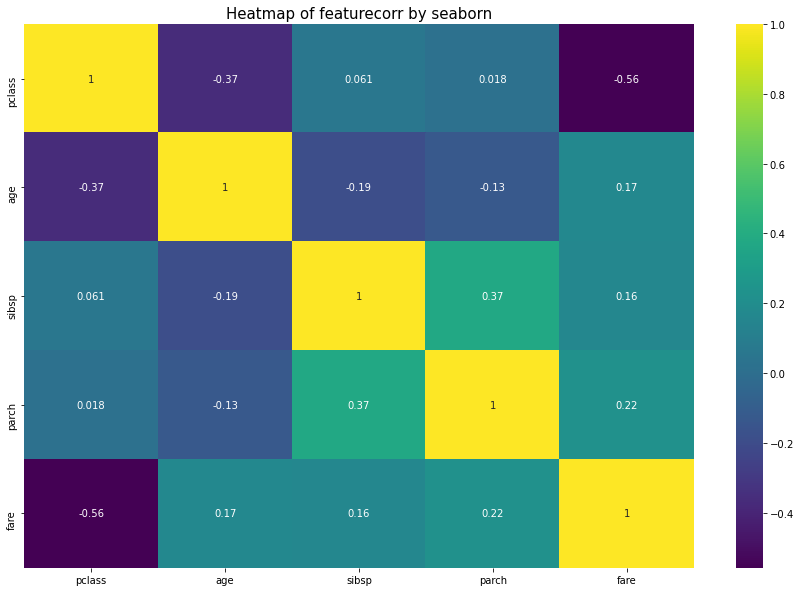

In [71]:
# feature heatmap 그려보기
featurecorr = feature.corr()
plt.figure(figsize=(15,10))
sns.heatmap(featurecorr, cmap='viridis', linecolor='white',annot=True )
#sns.heatmap(featurecorr, annot=True, fmt='f')
plt.title('Heatmap of featurecorr by seaborn', fontsize=15)

plt.show()

<AxesSubplot:xlabel='survived', ylabel='count'>

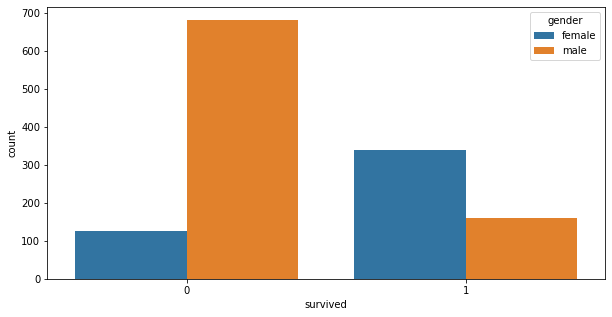

In [15]:
# 8-1. 시각화 - 성별에 따른 생존자 수

plt.figure(figsize=(10,5))
sns.countplot('survived', hue='gender', data=df)

<AxesSubplot:xlabel='survived', ylabel='Density'>

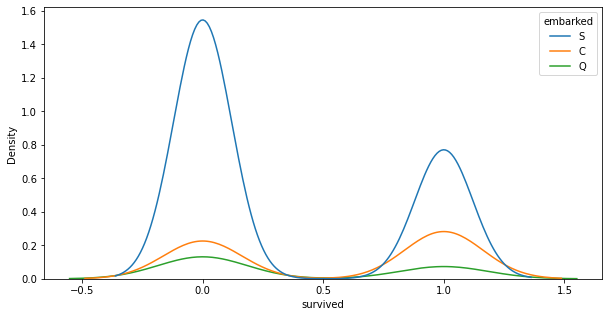

In [72]:
plt.figure(figsize=(10,5))
sns.kdeplot('survived', hue='embarked', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

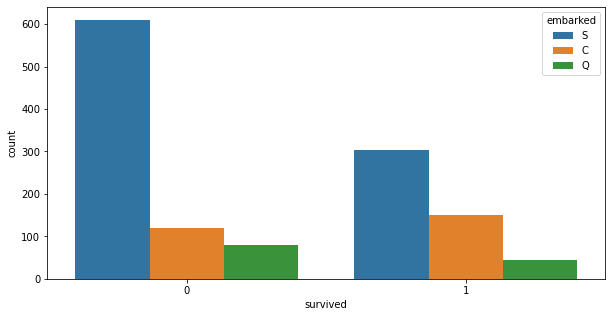

In [16]:
# 8-2 시각화 - 선실 등급에 따른 생존여부

plt.figure(figsize=(10,5))
sns.countplot('survived', hue='embarked', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

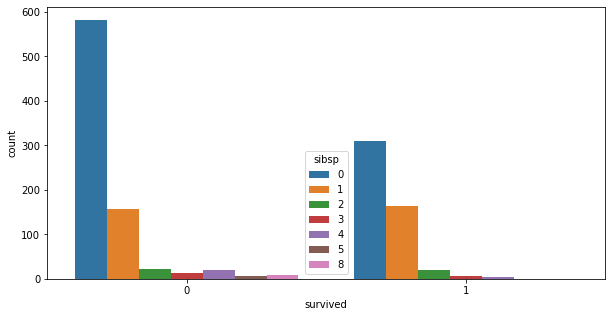

In [17]:
# 8-3 시각화 - 자매여부에 따른 생존여부

plt.figure(figsize=(10,5))
sns.countplot('survived', hue='sibsp', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

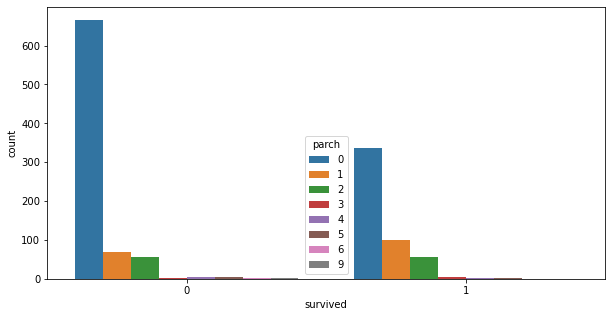

In [18]:
# 8-4 시각화 - 부모자식에 따른 생존여부

plt.figure(figsize=(10,5))
sns.countplot('survived', hue='parch', data=df)

In [19]:
# 9. X/y  분리
# 종속 변수를 담는 듯
y = df['survived']

# feature를 x축 독립변수들로 만듬
x = feature

In [20]:
x

,pclass,gender,age,sibsp,parch,fare,embarked
0,1,female,29.000000,0,0,211.3375,S
1,1,male,0.916700,1,2,151.5500,S
2,1,female,2.000000,1,2,151.5500,S
3,1,male,30.000000,1,2,151.5500,S
4,1,female,25.000000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,C
1305,3,female,29.881135,1,0,14.4542,C
1306,3,male,26.500000,0,0,7.2250,C
1307,3,male,27.000000,0,0,7.2250,C


In [22]:
# 10. 데이터 변환(one hot encoding)
# gender랑 embarked는 문자열이니까 숫자로 바꿔주기
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(),[1,6])], remainder='passthrough')

x = ct.fit_transform(feature)


print(x)

[[  1.       0.       0.     ...   0.       0.     211.3375]
 [  0.       1.       0.     ...   1.       2.     151.55  ]
 [  1.       0.       0.     ...   1.       2.     151.55  ]
 ...
 [  0.       1.       1.     ...   0.       0.       7.225 ]
 [  0.       1.       1.     ...   0.       0.       7.225 ]
 [  0.       1.       0.     ...   0.       0.       7.875 ]]


In [65]:
# 11. 훈련셋/평가셋 분리


# train_test_split으로 데이터를 나눠줌
# test_size로 train과 test 데이터의 비율을 설정할 수 있음 (default = 0.25)
# train_size도 설정가능 (default = 1-test_size)
# random_state로 셔플을 위한 seed 값을 지정할 수 있음(int로도 입력가능)
# shuffle도 설정가능. 데이터 섞을건지 (default = True)
# stratify도 설정가능 하며 classification을 다룰때 필요함. 한쪽에 치중되는 것을 방지 (default = None)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=3434)
#5323
#

In [66]:
# 12. 모델 학습
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
log_clf = LogisticRegression()
XGB_clf = XGBClassifier()

# 랜덤포레스트로 학습
rf_clf.fit(x_train, y_train)

# 예측값 만들기
y_pred = rf_clf.predict(x_test)

In [67]:
# 13. 모델 성능 확인(evaluate)


acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


print('accuracy = ',acc)
print('precision = ',pre)
print('recall = ',rec)

mae =  0.17302798982188294
mse =  0.17302798982188294
r2 =  0.2649356364836617
accuracy =  0.8269720101781171
precision =  0.7872340425531915
recall =  0.7449664429530202


[[468  97]
 [109 242]]


<AxesSubplot:>

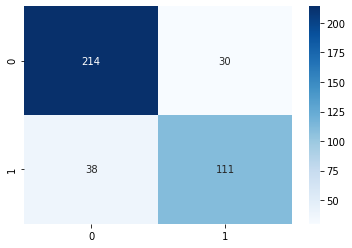

In [75]:
# 13-1. confusion matrix 확인
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(rf_clf, x_train, y_train, cv=3)
cf = confusion_matrix(y_train, y_train_pred)
print(cf)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       244
           1       0.79      0.74      0.77       149

    accuracy                           0.83       393
   macro avg       0.82      0.81      0.81       393
weighted avg       0.83      0.83      0.83       393



In [87]:
import random


range(0, 10000)

In [101]:
while True:
    
    
    a = random.randint(5500,10000)
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.3,
                                                        random_state=a)

    rf_clf.fit(x_train, y_train)
    y_pred = rf_clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    if acc>0.83:
        break
    if i == 9999:
        break
print(a)
print(classification_report(y_test, y_pred))

8926
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       238
           1       0.83      0.74      0.78       155

    accuracy                           0.83       393
   macro avg       0.83      0.82      0.82       393
weighted avg       0.83      0.83      0.83       393



In [99]:
print(acc)

0.8295165394402035


😊